In [2]:
from pathlib import Path

data_dir = Path("../data/raw")

# Sınıf klasörlerini bul
class_dirs = [p for p in data_dir.iterdir() if p.is_dir()]
class_dirs = sorted(class_dirs)  # isimlerine göre sırala

for cls_dir in class_dirs:
    n_images = len(list(cls_dir.glob("*.jpg")))
    print(f"{cls_dir.name}: {n_images} images")

MildDemented: 10000 images
ModerateDemented: 10000 images
NonDemented: 12800 images
VeryMildDemented: 11200 images


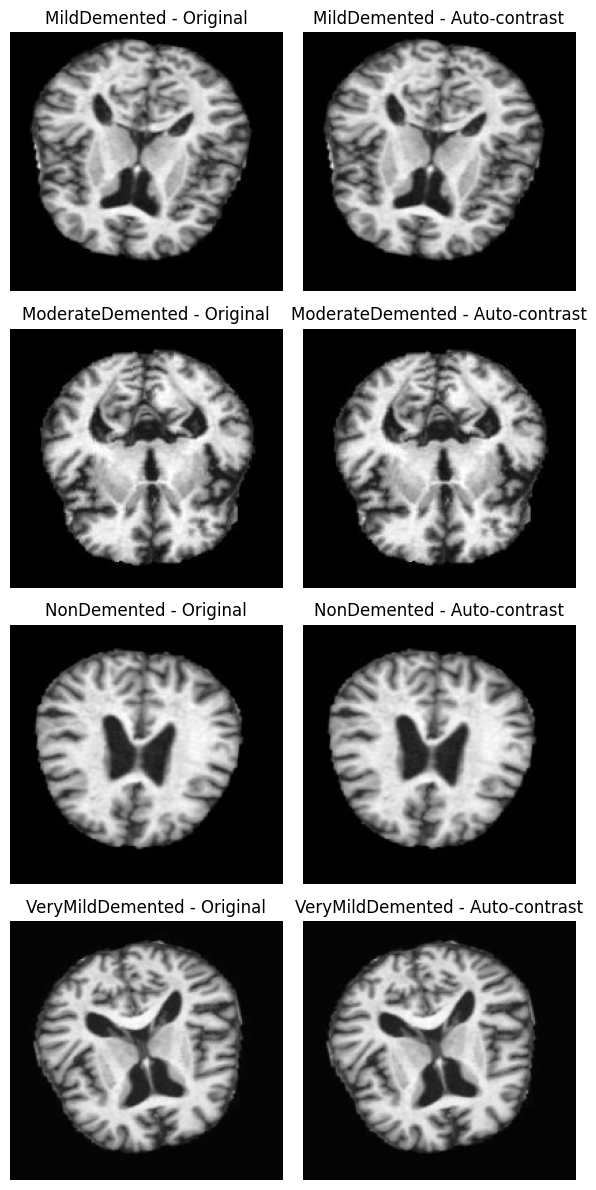

In [3]:
from PIL import Image, ImageOps
import matplotlib.pyplot as plt

examples = []

for cls_dir in class_dirs:
    # Klasördeki ilk .jpg dosyayı al
    example_path = next(cls_dir.glob("*.jpg"))
    examples.append((cls_dir.name, example_path))

examples

fig, axes = plt.subplots(len(examples), 2, figsize=(6, 3 * len(examples)))

for i, (class_name, img_path) in enumerate(examples):
    img = Image.open(img_path).convert("L")
    img_auto = ImageOps.autocontrast(img)

    # Orijinal
    axes[i, 0].imshow(img, cmap="gray")
    axes[i, 0].set_title(f"{class_name} - Original")
    axes[i, 0].axis("off")

    # Auto-contrast
    axes[i, 1].imshow(img_auto, cmap="gray")
    axes[i, 1].set_title(f"{class_name} - Auto-contrast")
    axes[i, 1].axis("off")

plt.tight_layout()
plt.show()
